# 워드 임베딩 편향성 조사 : 모든 장르 간 편향성 측정해 보기

## 1. 준비

### 1.1. 모듈, 라이브러리 준비 등

In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import os

In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 59.6 MB/s 


In [3]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:

import gensim
import konlpy
import sklearn
import seaborn

print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

0.6.0
4.1.2
1.0.2
0.11.2


### 1.2. 데이터 준비

In [3]:
data_path = '/content/drive/MyDrive/Aiffel/NLP/6.WEAT/synopsis'

In [4]:
with open('/content/drive/MyDrive/Aiffel/NLP/6.WEAT/synopsis/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

### 1.3. 명사 토큰 추출

In [5]:
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open('/content/drive/MyDrive/Aiffel/NLP/6.WEAT/synopsis/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [6]:
print(len(tokenized))

71156


## 2. 임베딩 모델 생성

### 2.1. 생성

In [7]:
from gensim.models import Word2Vec

model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

[('작품', 0.8626623153686523),
 ('다큐멘터리', 0.8531734943389893),
 ('드라마', 0.8036161065101624),
 ('스토리', 0.779199481010437),
 ('주제', 0.7774137258529663),
 ('영화로', 0.7772507667541504),
 ('인터뷰', 0.7759751677513123),
 ('감동', 0.7731351852416992),
 ('형식', 0.772290050983429),
 ('소재', 0.7708030343055725)]

### 2.2. 확인

In [8]:
model.wv.most_similar(positive=['사랑'])

[('행복', 0.7040463089942932),
 ('세츠코', 0.7006834149360657),
 ('애정', 0.6916820406913757),
 ('만남', 0.6847414374351501),
 ('진심', 0.6839600205421448),
 ('첫사랑', 0.6808761358261108),
 ('이별', 0.6756530404090881),
 ('운명', 0.6729989647865295),
 ('감정', 0.6719338297843933),
 ('정해준', 0.6699098348617554)]

In [9]:
model.wv.most_similar(positive=['연극'])

[('시나리오', 0.8848747611045837),
 ('영감', 0.8735678791999817),
 ('팬', 0.8698822259902954),
 ('대본', 0.8688875436782837),
 ('각색', 0.8683779835700989),
 ('배우', 0.8674946427345276),
 ('영화감독', 0.866860032081604),
 ('캐스팅', 0.8582701683044434),
 ('연기자', 0.8564397096633911),
 ('데뷔', 0.8537594079971313)]

## 3. 편향성 알아보기

### 3.1. 예술영화 / 상업영화 구분

In [10]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open('/content/drive/MyDrive/Aiffel/NLP/6.WEAT/synopsis/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)


In [11]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [13]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 3.2. TF-IDF

In [14]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

- 빈도수 상위 100개 중 중복되는 데이터를 제외하고 다시 상위 15개 추출

In [15]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [17]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


### 3.3. 장르별 구분

synopsis_SF.txt: SF

synopsis_가족.txt: 가족

synopsis_공연.txt: 공연

synopsis_공포(호러).txt: 공포(호러)

synopsis_기타.txt: 기타

synopsis_다큐멘터리.txt: 다큐멘터리

synopsis_드라마.txt: 드라마

synopsis_멜로로맨스.txt: 멜로로맨스

synopsis_뮤지컬.txt: 뮤지컬

synopsis_미스터리.txt: 미스터리

synopsis_범죄.txt: 범죄

synopsis_사극.txt: 사극

synopsis_서부극(웨스턴).txt: 서부극(웨스턴)

synopsis_성인물(에로).txt: 성인물(에로)

synopsis_스릴러.txt: 스릴러

synopsis_애니메이션.txt: 애니메이션

synopsis_액션.txt: 액션

synopsis_어드벤처.txt: 어드벤처

synopsis_전쟁.txt: 전쟁

synopsis_코미디.txt: 코미디

synopsis_판타지.txt: 판타지

In [18]:
os.listdir(data_path)

['synopsis.txt',
 'synopsis_gen.txt',
 'synopsis_art.txt',
 'synopsis_animation.txt',
 'synopsis_horror.txt',
 'synopsis_comedy.txt',
 'synopsis_etc.txt',
 'synopsis_musical.txt',
 'synopsis_family.txt',
 'synopsis_mystery.txt',
 'synopsis_drama.txt',
 'synopsis_thriller.txt',
 'synopsis_fantasy.txt',
 'synopsis_action.txt',
 'synopsis_western.txt',
 'synopsis_show.txt',
 'synopsis_war.txt',
 'synopsis_crime.txt',
 'synopsis_adult.txt',
 'synopsis_SF.txt',
 'synopsis_documentary.txt',
 'synopsis_romance.txt',
 'synopsis_historical.txt',
 'synopsis_adventure.txt']

In [19]:
file_list = os.listdir(data_path)

print ("file_list: {}".format(file_list))

file_list: ['synopsis.txt', 'synopsis_gen.txt', 'synopsis_art.txt', 'synopsis_animation.txt', 'synopsis_horror.txt', 'synopsis_comedy.txt', 'synopsis_etc.txt', 'synopsis_musical.txt', 'synopsis_family.txt', 'synopsis_mystery.txt', 'synopsis_drama.txt', 'synopsis_thriller.txt', 'synopsis_fantasy.txt', 'synopsis_action.txt', 'synopsis_western.txt', 'synopsis_show.txt', 'synopsis_war.txt', 'synopsis_crime.txt', 'synopsis_adult.txt', 'synopsis_SF.txt', 'synopsis_documentary.txt', 'synopsis_romance.txt', 'synopsis_historical.txt', 'synopsis_adventure.txt']


In [20]:
del file_list[0:3]
print(file_list)

['synopsis_animation.txt', 'synopsis_horror.txt', 'synopsis_comedy.txt', 'synopsis_etc.txt', 'synopsis_musical.txt', 'synopsis_family.txt', 'synopsis_mystery.txt', 'synopsis_drama.txt', 'synopsis_thriller.txt', 'synopsis_fantasy.txt', 'synopsis_action.txt', 'synopsis_western.txt', 'synopsis_show.txt', 'synopsis_war.txt', 'synopsis_crime.txt', 'synopsis_adult.txt', 'synopsis_SF.txt', 'synopsis_documentary.txt', 'synopsis_romance.txt', 'synopsis_historical.txt', 'synopsis_adventure.txt']


In [21]:
import copy
genre_txt = copy.deepcopy(file_list)
print(genre_txt)

['synopsis_animation.txt', 'synopsis_horror.txt', 'synopsis_comedy.txt', 'synopsis_etc.txt', 'synopsis_musical.txt', 'synopsis_family.txt', 'synopsis_mystery.txt', 'synopsis_drama.txt', 'synopsis_thriller.txt', 'synopsis_fantasy.txt', 'synopsis_action.txt', 'synopsis_western.txt', 'synopsis_show.txt', 'synopsis_war.txt', 'synopsis_crime.txt', 'synopsis_adult.txt', 'synopsis_SF.txt', 'synopsis_documentary.txt', 'synopsis_romance.txt', 'synopsis_historical.txt', 'synopsis_adventure.txt']


In [27]:
genre_name = ['애니메이션', '공포', '코미디', '기타', '뮤지컬', '가족', '미스터리', '드라마', '스릴러', '판타지', '액션', '서부극', '공연', '전쟁', '범죄', '성인물', 'SF', '다큐멘터리', '멜로로맨스', '사극', '어드벤처']

In [24]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.


In [28]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [29]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

애니메이션: 애니메이션, 국제, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


영화제, 친구, 인디애니페스트, 위해, 자신, 시작, 사람, 페스티벌, 서울, 이야기, 아이, 마을, 소녀, 
공포: 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
스릴러: 자신, 그녀, 사건, 시작, 위해, 사람, 살인, 남자, 발견, 아내, 경찰, 친구, 모든, 사실, 살해, 
판타지: 자신, 그녀, 시작, 위해, 사람, 사랑, 요괴, 영화제, 이야기, 영화, 소녀, 남자, 인간, 세상, 마을, 
액션: 위해, 자신, 시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 모든, 목숨, 사실, 친구, 가족, 요원, 
서부극: 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
전쟁: 전쟁, 독일군, 전투, 위해, 작전, 시작, 부대, 윈터스, 독일, 연합군, 미군, 임무, 자신, 사람, 나치, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람

## 4. WEAT score 구해보기

In [49]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

In [51]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [30]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [47]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

In [52]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [53]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

애니메이션 공포 -0.6938255
애니메이션 코미디 -0.7497244
애니메이션 기타 0.10546809
애니메이션 뮤지컬 0.09065425
애니메이션 가족 -0.882501
애니메이션 미스터리 -0.70031935
애니메이션 드라마 -0.9061842
애니메이션 스릴러 -0.5949454
애니메이션 판타지 -0.7014811
애니메이션 액션 -0.5092196
애니메이션 서부극 -0.70464706
애니메이션 공연 -0.89186305
애니메이션 전쟁 -0.24237996
애니메이션 범죄 -0.3957259
애니메이션 성인물 -0.7689154
애니메이션 SF -0.35644776
애니메이션 다큐멘터리 0.55736923
애니메이션 멜로로맨스 -0.894126
애니메이션 사극 -0.8477494
애니메이션 어드벤처 -0.92217267
공포 코미디 0.48435208
공포 기타 0.68161666
공포 뮤지컬 0.6537862
공포 가족 0.17591426
공포 미스터리 -0.6066332
공포 드라마 0.33264318
공포 스릴러 0.0071854093
공포 판타지 0.5633478
공포 액션 0.6167721
공포 서부극 0.45056197
공포 공연 0.29051915
공포 전쟁 0.6772987
공포 범죄 0.7236717
공포 성인물 -0.20487936
공포 SF 0.7249757
공포 다큐멘터리 0.7741963
공포 멜로로맨스 -0.64582694
공포 사극 0.14575598
공포 어드벤처 0.17079093
코미디 기타 0.7613251
코미디 뮤지컬 0.71275973
코미디 가족 -0.19625586
코미디 미스터리 -0.58200675
코미디 드라마 -0.0016646709
코미디 스릴러 -0.33723816
코미디 판타지 0.5229099
코미디 액션 -0.029956436
코미디 서부극 0.057923775
코미디 공연 0.049821783
코미디 전쟁 0.53422326
코미디 범죄 0.121892646
코미디 성인물 -0

In [69]:
%config InlineBackend.figure_format = 'retina'

In [70]:
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [76]:
!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
!mv malgun.ttf /usr/share/fonts/truetype/
import matplotlib.font_manager as fm 
fm._rebuild() 

--2022-04-04 14:34:13--  https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9595100 (9.2M) [application/octetstream]
Saving to: ‘malgun.ttf’

malgun.ttf          100%[===================>]   9.15M  8.98MB/s    in 1.0s    

2022-04-04 14:34:15 (8.98 MB/s) - ‘malgun.ttf’ saved [9595100/9595100]



In [77]:
!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
!mv malgun.ttf /usr/share/fonts/truetype/


--2022-04-04 14:34:28--  https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9595100 (9.2M) [application/octetstream]
Saving to: ‘malgun.ttf’

malgun.ttf          100%[===================>]   9.15M  9.01MB/s    in 1.0s    

2022-04-04 14:34:29 (9.01 MB/s) - ‘malgun.ttf’ saved [9595100/9595100]



In [78]:
mpl.font_manager._rebuild()

In [88]:
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeOneSym',
 'STIXSizeFourSym',
 'STIXGeneral',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'cmss10',
 'cmex10',
 'DejaVu Sans Mono',
 'cmtt10',
 'DejaVu Sans',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'cmr10',
 'STIXSizeTwoSym',
 'cmsy10',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'cmmi10',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXNonUnicode',
 'cmb10',
 'NanumSquare',
 'NanumGothic Eco',
 'Liberation Serif',
 'NanumMyeongjo Eco',
 'NanumMyeongjo Eco',
 'Nanum Brush Script',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumGothic',
 'Liberation Mono',
 'NanumBarunGothic',
 'NanumGothicCoding',
 'Liberation Sans',
 'NanumBarunpen',
 'NanumGothic',
 'NanumGothic',
 'NanumSquare',
 'Liberation Sans',

In [79]:
sys_font=fm.findSystemFonts()

In [80]:
print(sys_font)

['/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/true

In [83]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 156228 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [84]:
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [85]:
from plotnine import *
import plotnine

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

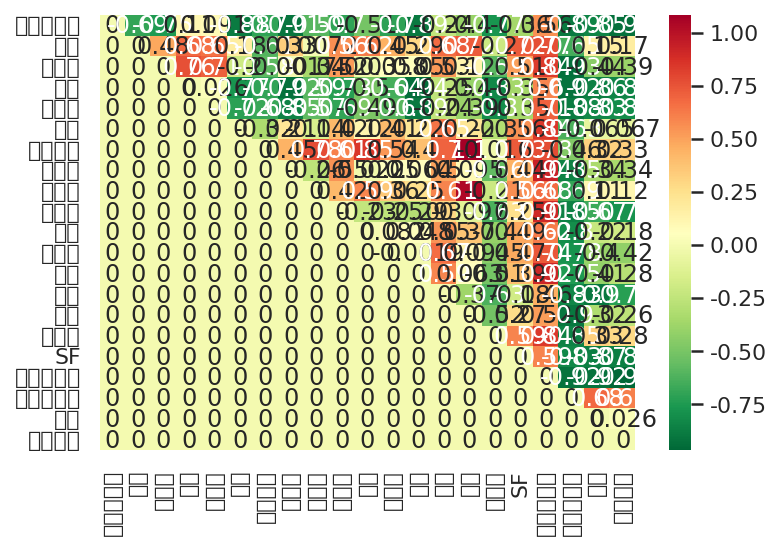

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

#font_name = fm.FontProperties(fname='/usr/share/fonts/truetype/malgun.ttf').get_name()
sns.set(font='NanumBarunGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False


ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

## 마치며


### 기억에 남는 학습 내용
-


### 어려웠던 점
-


### 추가로 해보고 싶은 점
-


### 총평

다른 내용 다 기억 안나고 씨본에 한글 폰트가 적용되지 않아 진 뺀 것이 너무 고통스러웠다. 일단 제출합니다.
